In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Mapa
import folium

# Procesamiento de datos
from sklearn.preprocessing import MinMaxScaler

# Modelo
from sklearn.linear_model import LinearRegression

# Separar train y test
from sklearn.model_selection import train_test_split

# Métricas
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

ModuleNotFoundError: No module named 'numpy'

In [ ]:
df = pd.read_csv("housing.csv")

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
df.shape

(20640, 10)

### Vemos las estadísticas del dataset

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.info()

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Visualizamos la relación entre columnas con la variable objetivo "median_income"

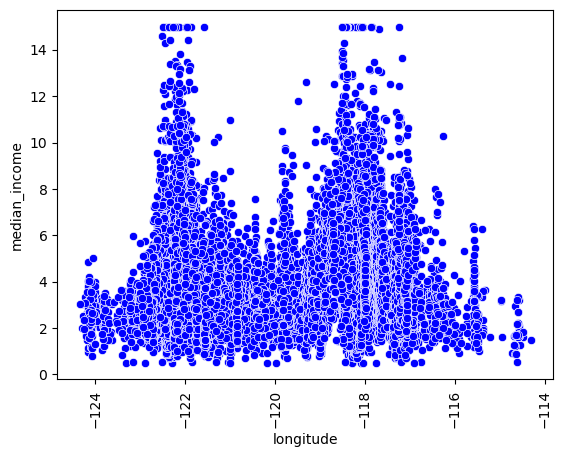

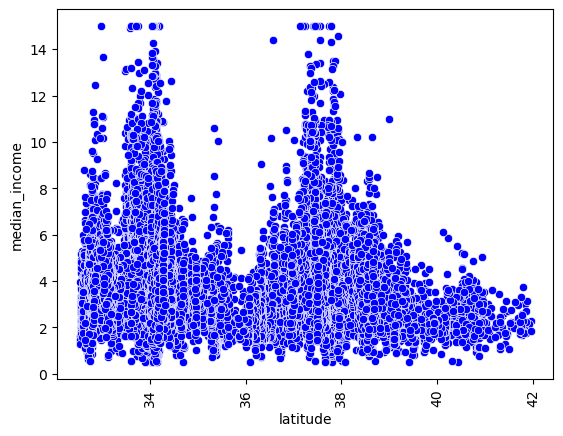

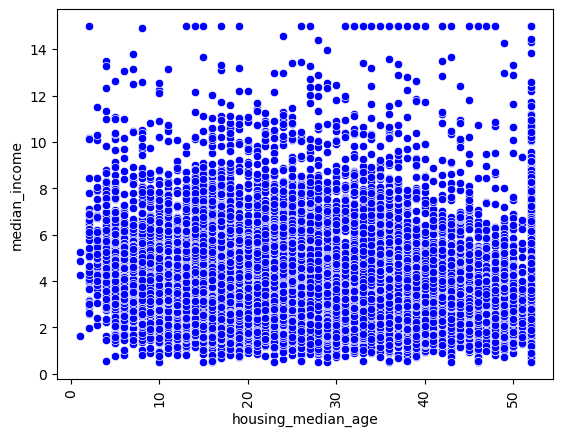

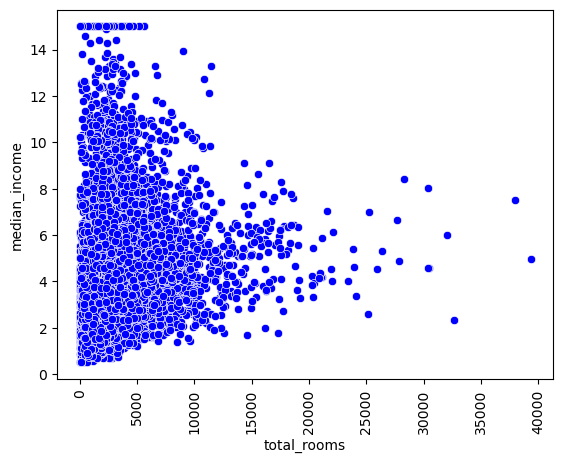

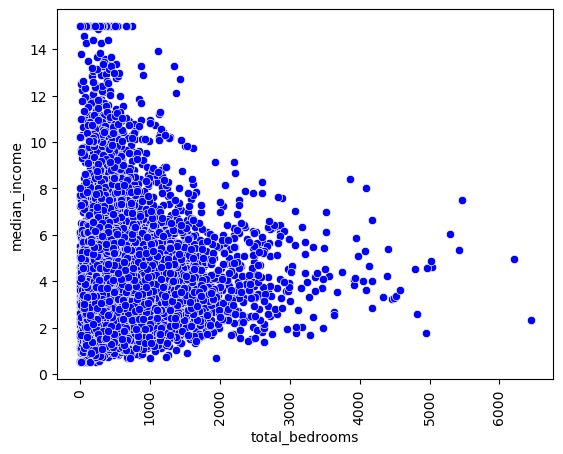

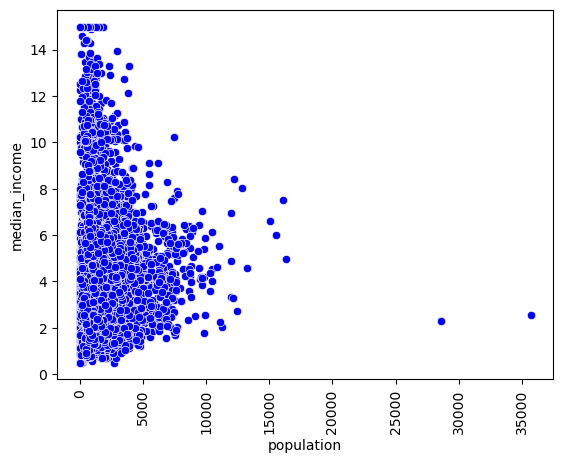

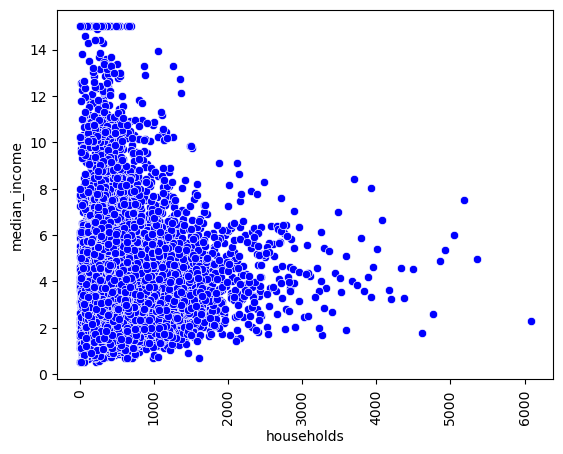

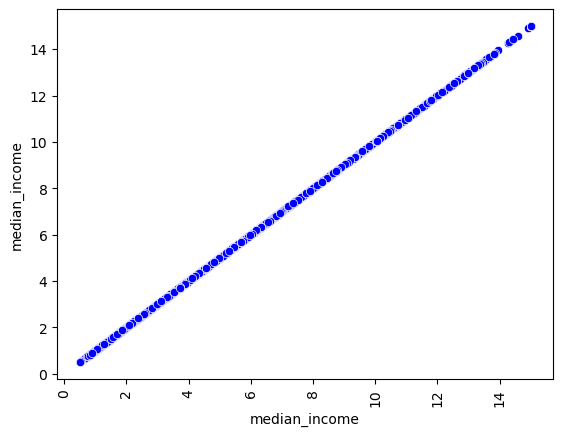

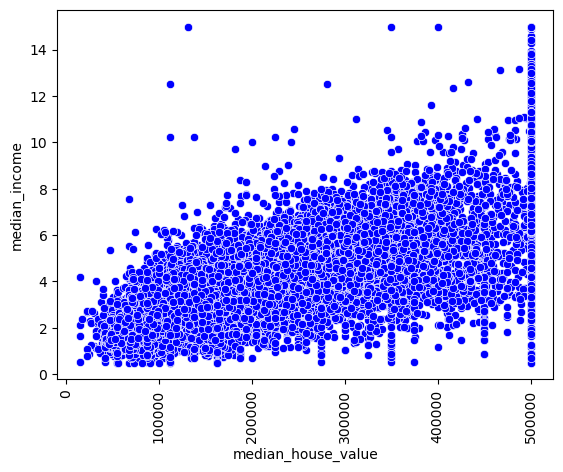

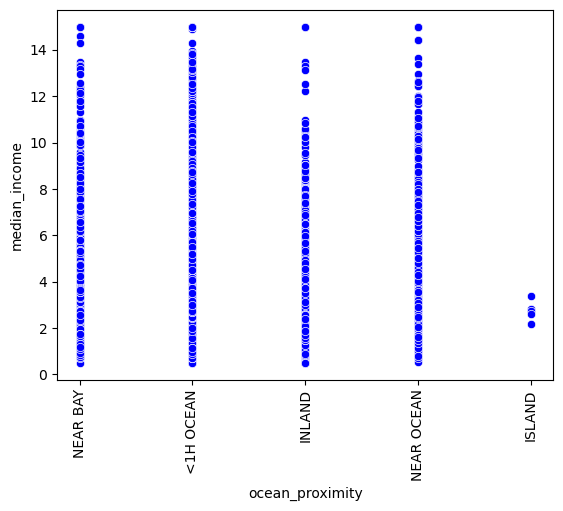

In [ ]:
for col in df.columns:
    sns.scatterplot(x = df[col], y = df["median_income"], color = "b")
    plt.xticks(rotation = 90)
    plt.show()

### Analizamos los nulos

In [ ]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### Borramos los nulos en lugar de trabajarlos porque son muy pocos en comparación con la cantidad de datos que tenemos.


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
df.shape

(20433, 10)

### No hay duplicados

In [ ]:
df[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


### Vemos el tipo de dato de las columnas

In [ ]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [ ]:
lista = ["total_rooms", "total_bedrooms", "population", "households", "median_income"]

In [ ]:
df_flotante = df[lista]

In [ ]:
df_flotante.head()

,total_rooms,total_bedrooms,population,households,median_income
0,880.0,129.0,322.0,126.0,8.3252
1,7099.0,1106.0,2401.0,1138.0,8.3014
2,1467.0,190.0,496.0,177.0,7.2574
3,1274.0,235.0,558.0,219.0,5.6431
4,1627.0,280.0,565.0,259.0,3.8462


In [ ]:
sns.boxplot(x = df_flotante["total_rooms"], y = df_flotante["median_income"])

KeyboardInterrupt: 

### Cambiamos el tipo de dato de las columnas numéricas a int

In [ ]:
for i in df.columns:
    if i != "ocean_proximity":
        df[i] = df[i].astype(int)

In [ ]:
df.dtypes

longitude              int32
latitude               int32
housing_median_age     int32
total_rooms            int32
total_bedrooms         int32
population             int32
households             int32
median_income          int32
median_house_value     int32
ocean_proximity       object
dtype: object

### Analizando si la columna categórica tiene datos erróneos y repetidos

In [ ]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

### Correlación entre variables cuantitativas

In [2]:
df_columns = df[["housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]]

NameError: name 'df' is not defined

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(data= df_columns.corr().round(3), annot = True)
plt.show()

### Media de ingreso está en 10miles

In [6]:
df["median_income"] = df["median_income"]*10000

NameError: name 'df' is not defined

### Mapa

In [ ]:
data = json.load(open('caCountiesTopoSimple.json'))

In [ ]:
california_map = folium.Map(location=[0,0], zoom_start=0)
ocean = folium.map.FeatureGroup()

coor_classes = {}

for index, row in df.iterrows():
    coordinates = (row["latitude"], row["longitude"])
    folium.Marker(location=coordinates).add_to(california_map)

In [ ]:
map.save('california_map.html')